In [1]:
import keras 
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from keras.datasets import imdb #cargo los datos del imdb
from numpy import genfromtxt
from keras.utils import to_categorical
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [2]:
def randomize(x,y):
    #x matriz de datos (datos x dimension)
    #y matriz de datos verdaderos (datos x 1)
    indices = np.random.choice(x.shape[0], x.shape[0], replace=False)
    x = x[indices]
    y = y[indices]
    return x,y

In [3]:
data = genfromtxt('pima-indians-diabetes.csv', delimiter=',') #cargo los datos
x_total = data[:,:8] #valores de los datos relevantes para saber si tiene/no tiene diabetes
y_total = data[:,8] #diagnostico (1 o 0, si o no tiene la enfermedad)

In [4]:
#creo datos de test y train primero, como lo haciamos antes
n_datos = x_total.shape[0] #o sea, n_datos = 768
n_dim = x_total.shape[1] #o sea, n_dim = 8
cant_test = int(0.25*n_datos)
x_total,y_total = randomize(x_total,y_total)
y_total = to_categorical(y_total)
x_train = x_total[cant_test:,:]
y_train = y_total[cant_test:,:]
x_test = x_total[:cant_test,:]
y_test = y_total[:cant_test,:]

In [306]:
#defino algunas constantes que son utiles, como en problemas anteriores
n_capa1 = 16 #dice 2 porque iba a ser de la capa 2
n_capa2 = 16
n_capa3 = 2 #idem. por prueba empirica y tiempo, al ver que funcionaba lo deje asi. 
rg = 1e-4
lr = 1e-3
epocas = 200 #cantidad de epocas

In [307]:
x = keras.layers.Input(shape=(n_dim,)) #capa de input
l1 = keras.layers.Dense(units=n_capa1, activation='tanh',kernel_initializer='uniform',
                        kernel_regularizer=keras.regularizers.l2(rg))(x)
l2 = keras.layers.Dense(units=n_capa2, activation='tanh',kernel_initializer='uniform',
                        kernel_regularizer=keras.regularizers.l2(rg))(l1)
l3 = keras.layers.Dense(units=n_capa3, activation='sigmoid',
                        kernel_regularizer=keras.regularizers.l2(rg))(l2)
model = keras.Model(inputs=x, outputs=l3)
optimizer = keras.optimizers.SGD(learning_rate=lr)
model.compile(optimizer, loss=keras.losses.MSE, metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epocas, validation_data=(x_test, y_test),batch_size=64, verbose=2)

Train on 576 samples, validate on 192 samples
Epoch 1/200
 - 0s - loss: 0.2503 - acc: 0.5469 - val_loss: 0.2489 - val_acc: 0.6198
Epoch 2/200
 - 0s - loss: 0.2481 - acc: 0.6250 - val_loss: 0.2479 - val_acc: 0.6354
Epoch 3/200
 - 0s - loss: 0.2463 - acc: 0.6615 - val_loss: 0.2472 - val_acc: 0.6250
Epoch 4/200
 - 0s - loss: 0.2447 - acc: 0.6684 - val_loss: 0.2465 - val_acc: 0.6250
Epoch 5/200
 - 0s - loss: 0.2434 - acc: 0.6632 - val_loss: 0.2459 - val_acc: 0.6094
Epoch 6/200
 - 0s - loss: 0.2421 - acc: 0.6615 - val_loss: 0.2455 - val_acc: 0.6094
Epoch 7/200
 - 0s - loss: 0.2409 - acc: 0.6632 - val_loss: 0.2450 - val_acc: 0.6094
Epoch 8/200
 - 0s - loss: 0.2397 - acc: 0.6649 - val_loss: 0.2446 - val_acc: 0.6094
Epoch 9/200
 - 0s - loss: 0.2385 - acc: 0.6649 - val_loss: 0.2440 - val_acc: 0.6094
Epoch 10/200
 - 0s - loss: 0.2374 - acc: 0.6649 - val_loss: 0.2433 - val_acc: 0.6094
Epoch 11/200
 - 0s - loss: 0.2363 - acc: 0.6649 - val_loss: 0.2426 - val_acc: 0.6094
Epoch 12/200
 - 0s - loss: 0

Epoch 97/200
 - 0s - loss: 0.2197 - acc: 0.6649 - val_loss: 0.2312 - val_acc: 0.6094
Epoch 98/200
 - 0s - loss: 0.2197 - acc: 0.6649 - val_loss: 0.2311 - val_acc: 0.6094
Epoch 99/200
 - 0s - loss: 0.2196 - acc: 0.6649 - val_loss: 0.2311 - val_acc: 0.6094
Epoch 100/200
 - 0s - loss: 0.2196 - acc: 0.6649 - val_loss: 0.2311 - val_acc: 0.6094
Epoch 101/200
 - 0s - loss: 0.2196 - acc: 0.6649 - val_loss: 0.2310 - val_acc: 0.6094
Epoch 102/200
 - 0s - loss: 0.2195 - acc: 0.6649 - val_loss: 0.2309 - val_acc: 0.6094
Epoch 103/200
 - 0s - loss: 0.2194 - acc: 0.6649 - val_loss: 0.2309 - val_acc: 0.6094
Epoch 104/200
 - 0s - loss: 0.2194 - acc: 0.6649 - val_loss: 0.2308 - val_acc: 0.6094
Epoch 105/200
 - 0s - loss: 0.2194 - acc: 0.6649 - val_loss: 0.2308 - val_acc: 0.6094
Epoch 106/200
 - 0s - loss: 0.2193 - acc: 0.6649 - val_loss: 0.2308 - val_acc: 0.6094
Epoch 107/200
 - 0s - loss: 0.2193 - acc: 0.6649 - val_loss: 0.2307 - val_acc: 0.6094
Epoch 108/200
 - 0s - loss: 0.2192 - acc: 0.6649 - val_lo

Epoch 193/200
 - 0s - loss: 0.2136 - acc: 0.6649 - val_loss: 0.2247 - val_acc: 0.6094
Epoch 194/200
 - 0s - loss: 0.2136 - acc: 0.6649 - val_loss: 0.2247 - val_acc: 0.6094
Epoch 195/200
 - 0s - loss: 0.2136 - acc: 0.6649 - val_loss: 0.2247 - val_acc: 0.6094
Epoch 196/200
 - 0s - loss: 0.2135 - acc: 0.6649 - val_loss: 0.2245 - val_acc: 0.6094
Epoch 197/200
 - 0s - loss: 0.2135 - acc: 0.6649 - val_loss: 0.2246 - val_acc: 0.6094
Epoch 198/200
 - 0s - loss: 0.2134 - acc: 0.6649 - val_loss: 0.2246 - val_acc: 0.6094
Epoch 199/200
 - 0s - loss: 0.2134 - acc: 0.6649 - val_loss: 0.2245 - val_acc: 0.6094
Epoch 200/200
 - 0s - loss: 0.2133 - acc: 0.6649 - val_loss: 0.2245 - val_acc: 0.6094


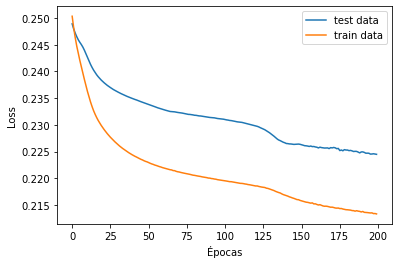

In [308]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej6_1_lossepoch.pdf')

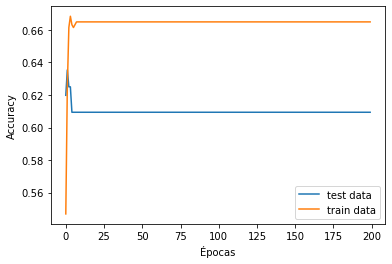

In [309]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej6_1_lossacc.pdf')

# implementando 5 fold

In [9]:
num_folds = 5
acc_folds = []
loss_folds = []
num_fold = 1
n_capa2 = 100 #dice 2 porque iba a ser de la capa 2
n_capa3 = 10
n_capa4 = 2 #idem. por prueba empirica y tiempo, al ver que funcionaba lo deje asi. 
lr = 1e-3
rg = 1e-3
epocas = 200 #cantidad de epocas
kf = KFold(n_splits=num_folds)
kf.get_n_splits(x_total)
for train, test in kf.split(x_total):
    print('Fold number: ',num_fold)
    x = keras.layers.Input(shape=(n_dim,)) #capa de input
    l1 = keras.layers.Dense(units=n_capa2, activation='relu',kernel_regularizer=keras.regularizers.l2(rg))(x)
    l2 = keras.layers.Dense(units=n_capa3, activation='relu',kernel_regularizer=keras.regularizers.l2(rg))(l1)
    l4 = keras.layers.Dense(units=n_capa4, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(rg))(l2)
    model = keras.Model(inputs=x, outputs=l4)
    optimizer = keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer, loss=keras.losses.MSE, metrics=['acc'])
    history1 = model.fit(x_total[train], y_total[train], epochs=epocas, 
                        validation_data=(x_total[test], y_total[test]),batch_size=100, verbose=0)
    acc_folds.append(history.history['val_acc'])
    loss_folds.append(history.history['val_loss'])
    num_fold = num_fold + 1

Fold number:  1
Fold number:  2
Fold number:  3
Fold number:  4
Fold number:  5
